In [1]:
# basic package
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Projects/FirePrediction/data.csv', index_col=0)

# Geo spacial data

In [2]:
percentage_of_each_label = df['STAT_CAUSE_DESCR'].value_counts(normalize=True)
percentage_of_each_label

STAT_CAUSE_DESCR
Debris Burning    0.250381
Miscellaneous     0.189652
Arson             0.163283
Lightning         0.162851
Equipment Use     0.086491
Campfire          0.044393
Children          0.035620
Smoking           0.030749
Railroad          0.019343
Powerline         0.008283
Fireworks         0.006764
Structure         0.002191
Name: proportion, dtype: float64

In [3]:
# in this method, we can only explore catagorical features with less values
def plot_crosstab_heatmap(df, feature_name):
  cross_Vals = pd.crosstab(df[feature_name], df['STAT_CAUSE_DESCR'],  normalize='index')
  sns.heatmap(cross_Vals, annot=True, annot_kws={"fontsize":4})
  plt.title(f'heatmap for values x classes for {feature_name}')
  plt.show()

def plot_big_crosstab(df, feature_name, n_rows, n_cols):
  # no need input check here: n_rows/cols of the plot, not of dataframe
  total_plots = n_rows * n_cols
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
  cross_Vals = pd.crosstab(df[feature_name], df['STAT_CAUSE_DESCR'],  normalize='index')
  axes = axes.flatten()

  for i in range(total_plots):
    start_idx = i * len(cross_Vals) // total_plots
    end_idx = (i + 1) * len(cross_Vals) // total_plots
    subset_df = cross_Vals.iloc[start_idx: end_idx]
    sns.heatmap(subset_df, annot=True, annot_kws={"fontsize":4}, ax=axes[i])
  plt.show()

def plot_crosstab_heatmap_vs_original(df, feature_name):
  cross_Vals = pd.crosstab(df[feature_name], df['STAT_CAUSE_DESCR'],  normalize='index')
  cross_Vals = cross_Vals.div(percentage_of_each_label, axis=1)
  sns.heatmap(cross_Vals, annot=True, annot_kws={"fontsize":4})
  plt.title(f'heatmap for values x classes for {feature_name}')
  plt.show()

def plot_big_crosstab_vs_original(df, feature_name, n_rows, n_cols):
  # no need input check here: n_rows/cols of the plot, not of dataframe
  total_plots = n_rows * n_cols
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
  cross_Vals = pd.crosstab(df[feature_name], df['STAT_CAUSE_DESCR'],  normalize='index')
  cross_Vals = cross_Vals.div(percentage_of_each_label, axis=1)
  axes = axes.flatten()

  for i in range(total_plots):
    start_idx = i * len(cross_Vals) // total_plots
    end_idx = (i + 1) * len(cross_Vals) // total_plots
    subset_df = cross_Vals.iloc[start_idx: end_idx]
    sns.heatmap(subset_df, annot=True, annot_kws={"fontsize":4}, ax=axes[i])
  plt.show()


The first thing I want to check is the distribution difference between states, see if there is anything interesting.

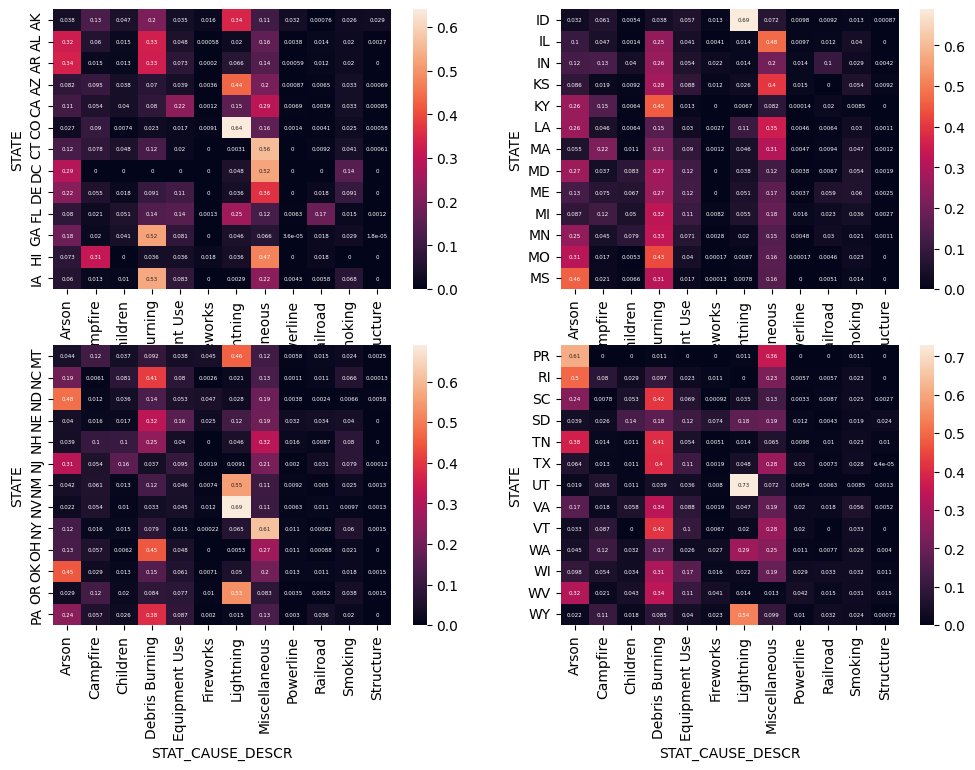

In [4]:
plot_big_crosstab(df, 'STATE', 2, 2)

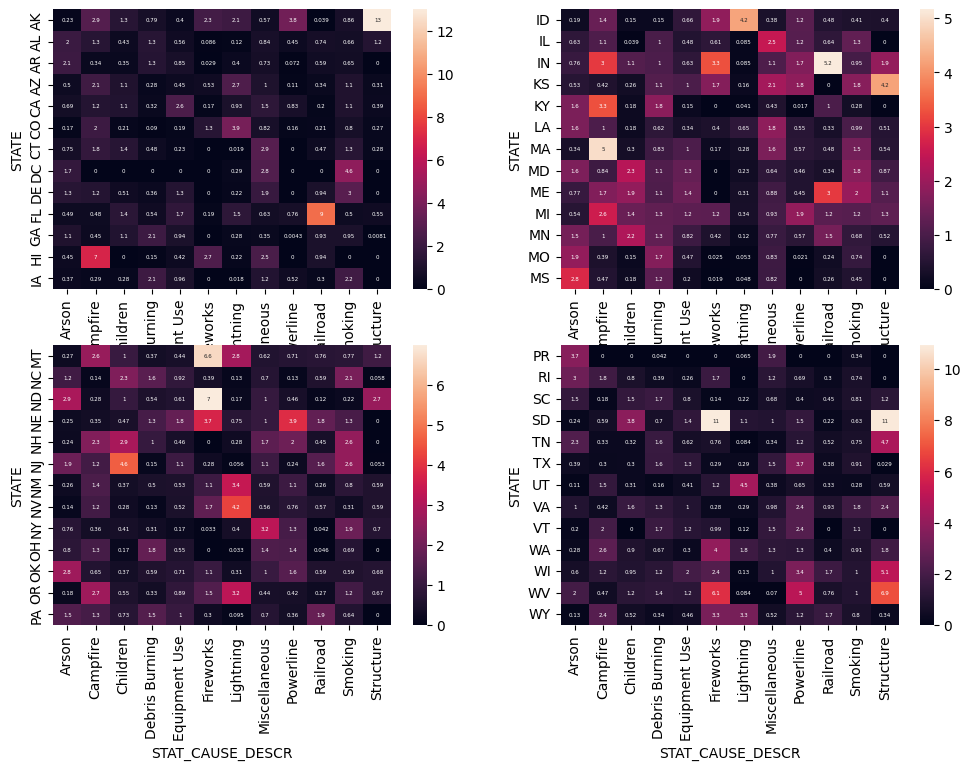

In [5]:
plot_big_crosstab_vs_original(df, 'STATE', 2, 2)

# FIRE_YEAR

I want to look at the fire year's relation to distribution of fires

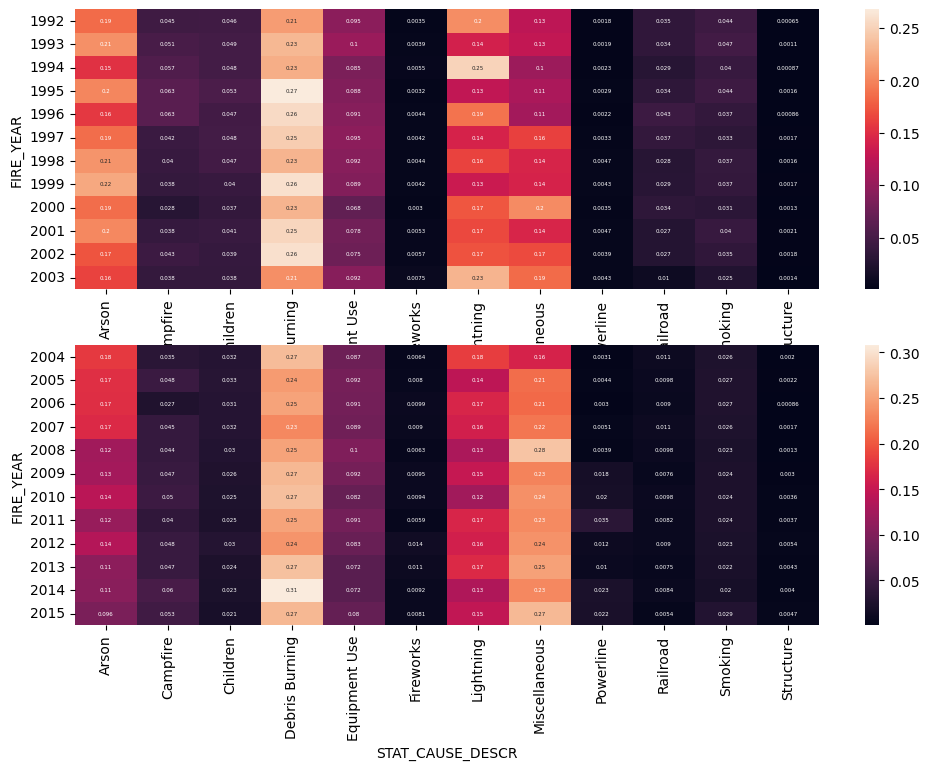

In [6]:
plot_big_crosstab(df, 'FIRE_YEAR', 2, 1)

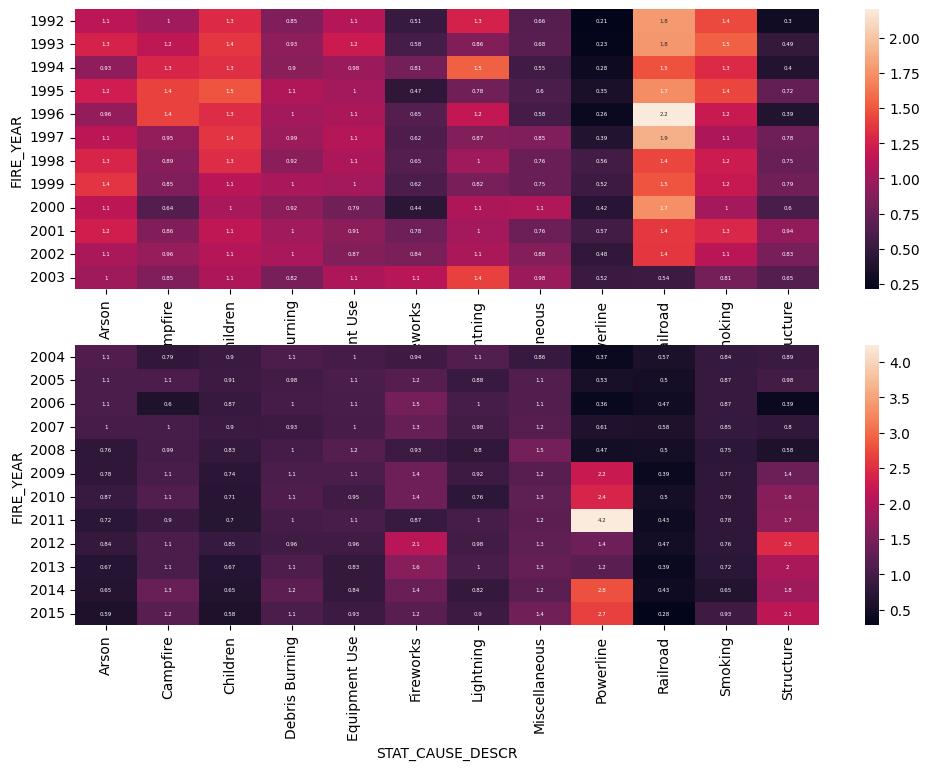

In [7]:
plot_big_crosstab_vs_original(df, 'FIRE_YEAR', 2, 1)

# Delta Time

In [8]:
# basic package
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Projects/FirePrediction/data.csv', index_col=0)

In [9]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['DISCOVERY_TIME'] = pd.to_datetime(df['DISCOVERY_TIME'], format='%H%M', errors='coerce').dt.time
df['DISCOVERY_DATETIME'] = pd.to_datetime(df['DISCOVERY_DATE'].astype(str) + ' ' + df['DISCOVERY_TIME'].astype(str),
                                          format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['CONT_DATE']= pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_TIME'] = pd.to_datetime(df['CONT_TIME'], format='%H%M', errors='coerce').dt.time
df['CONT_DATETIME'] = pd.to_datetime(df['CONT_DATE'].astype(str) + ' ' + df['CONT_TIME'].astype(str),
                                          format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Calculate the time difference
df['DELTA_TIME'] = (df['CONT_DATETIME'] - df['DISCOVERY_DATETIME']).dt.total_seconds()

In [10]:
df = df.dropna(subset=['DELTA_TIME'])

# we discovered that some delta time is negative, that is not possible, we guess that either its error, or it's just mixed am and pm.
df = df[df['DELTA_TIME'] >= 0]


First let's check the personal correlation with FIRE_SIZE

In [11]:
from scipy import stats
res = stats.pearsonr(df['DELTA_TIME'], df['FIRE_SIZE'])
res

PearsonRResult(statistic=0.10726675539761502, pvalue=0.0)

And let's check the correlation matrix

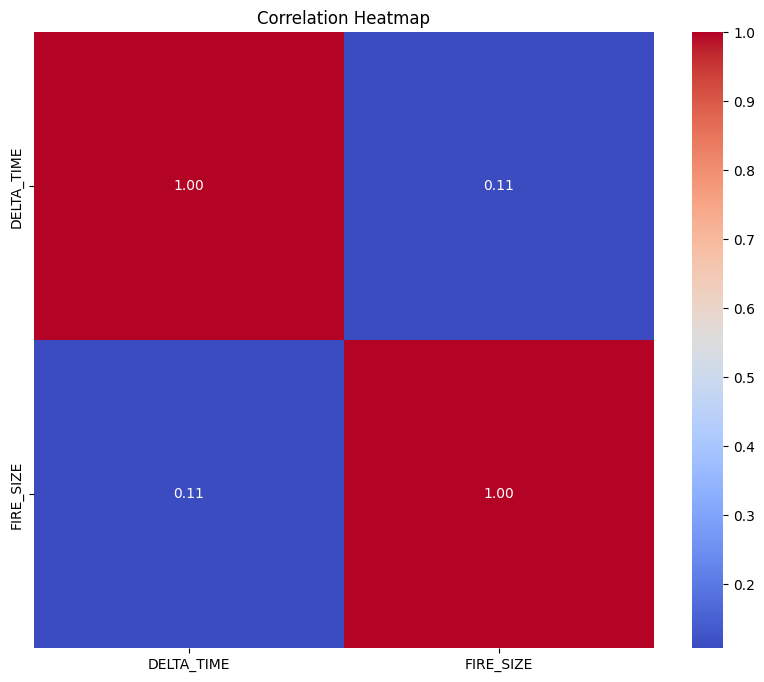

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with two numerical features 'feature1' and 'feature2'
correlation_matrix = df[['DELTA_TIME', 'FIRE_SIZE']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

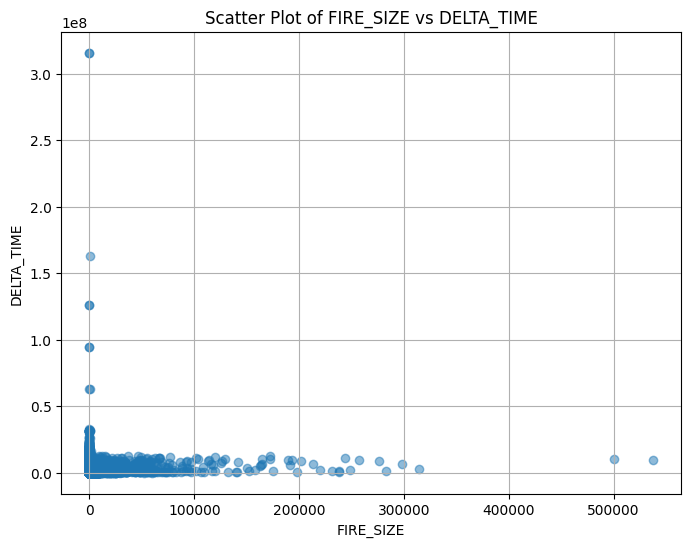

In [13]:
feature2 = 'DELTA_TIME'
feature1 = 'FIRE_SIZE'
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], alpha=0.5)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.show()

Now let's see how it relates to catagorical features: I will take FIRE_SIZE_CLASS and the target STAT_CUASE_CODE.  
Let's see what's the mean and variance for each class of the catagory.

In [34]:
import matplotlib.pyplot as plt

def plot_mean_variance_by_category(feature1, feature3, df, rotate_x_lable=False):
    # Group data by categories of feature3 and calculate mean and variance for each group
    grouped_data = df.groupby(feature3)[feature1].agg(['mean', 'std']).reset_index()

    # Plot bar chart for each category
    plt.bar(grouped_data[feature3], grouped_data['mean'], yerr= grouped_data['std'])

    plt.title(f'Mean and Variance of {feature1} by {feature3}')
    if rotate_x_lable == True:
      plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature3)
    plt.ylabel('Value')
    plt.show()

def plot_box_plot(feature1, feature3, df, rotate_x_lable=False):
    df.boxplot(column=feature1, by=feature3)

    plt.title(f'Mean and Variance of {feature1} by {feature3}')
    if rotate_x_lable == True:
      plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature3)
    plt.ylabel('Value')
    plt.show()

In [15]:
grouped_data = df.groupby('FIRE_SIZE_CLASS')['DELTA_TIME'].agg(['mean', 'std']).reset_index()
grouped_data

,FIRE_SIZE_CLASS,mean,std
0,A,9.030503e+04,1.208535e+06
1,B,7.436400e+04,1.224648e+06
2,C,1.157785e+05,5.816826e+05
3,D,3.886296e+05,2.879512e+06
4,E,6.714156e+05,1.622384e+06
5,F,1.235929e+06,2.158350e+06
6,G,2.889477e+06,3.134117e+06


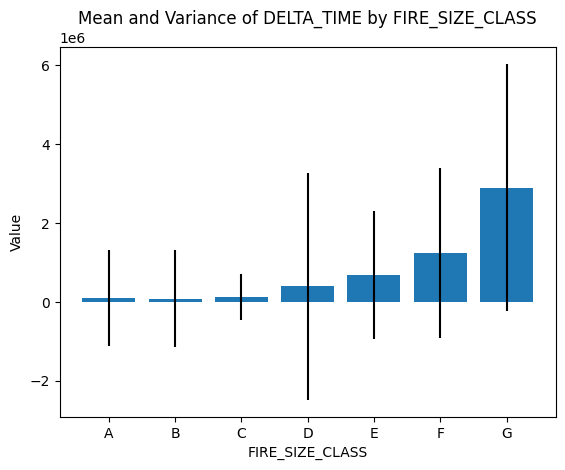

In [35]:
plot_mean_variance_by_category('DELTA_TIME', 'FIRE_SIZE_CLASS', df)

Seems wired, let's dig deeper

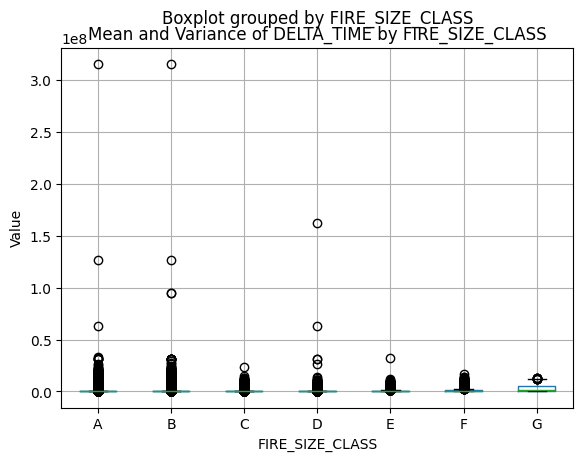

In [36]:
plot_box_plot('DELTA_TIME', 'FIRE_SIZE_CLASS', df)

Let's see the outliers

In [23]:
non_outlier_list = []
for fire_size_class in df['FIRE_SIZE_CLASS'].unique():
  df_by_fire_size = df[df['FIRE_SIZE_CLASS']==fire_size_class]
  # Step 1: Calculate Q1 and Q3
  Q1 = df_by_fire_size['DELTA_TIME'].quantile(0.25)
  Q3 = df_by_fire_size['DELTA_TIME'].quantile(0.75)

  # Step 2: Calculate IQR
  IQR = Q3 - Q1

  # Step 3: Define threshold for outliers
  threshold = 1.5

  # Step 4: Identify outliers
  non_outlier = df_by_fire_size[(df_by_fire_size['DELTA_TIME'] >= Q1 - threshold * IQR) & (df_by_fire_size['DELTA_TIME'] <= Q3 + threshold * IQR)]
  non_outlier_list.append(non_outlier)
df_non_outlier = pd.concat(non_outlier_list)


Now let's look at how the box looks like

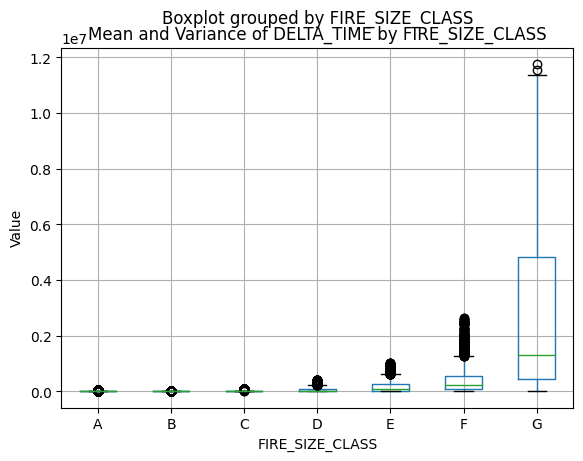

In [24]:
plot_box_plot('DELTA_TIME', 'FIRE_SIZE_CLASS', df_non_outlier)

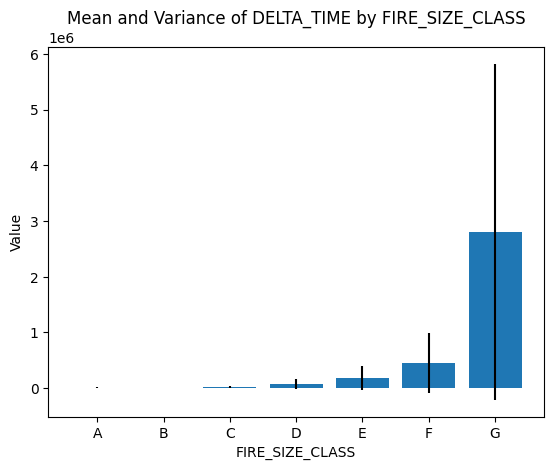

In [25]:
plot_mean_variance_by_category('DELTA_TIME', 'FIRE_SIZE_CLASS', df_non_outlier)

Let's try to define outliers by fire size in each fire size class

In [26]:
non_outlier_list = []
for fire_size_class in df['FIRE_SIZE_CLASS'].unique():
  df_by_fire_size = df[df['FIRE_SIZE_CLASS']==fire_size_class]
  # Step 1: Calculate Q1 and Q3
  Q1 = df_by_fire_size['FIRE_SIZE'].quantile(0.25)
  Q3 = df_by_fire_size['FIRE_SIZE'].quantile(0.75)

  # Step 2: Calculate IQR
  IQR = Q3 - Q1

  # Step 3: Define threshold for outliers
  threshold = 1.5

  # Step 4: Identify outliers
  non_outlier = df_by_fire_size[(df_by_fire_size['FIRE_SIZE'] >= Q1 - threshold * IQR) & (df_by_fire_size['FIRE_SIZE'] <= Q3 + threshold * IQR)]
  non_outlier_list.append(non_outlier)
df_non_outlier = pd.concat(non_outlier_list)

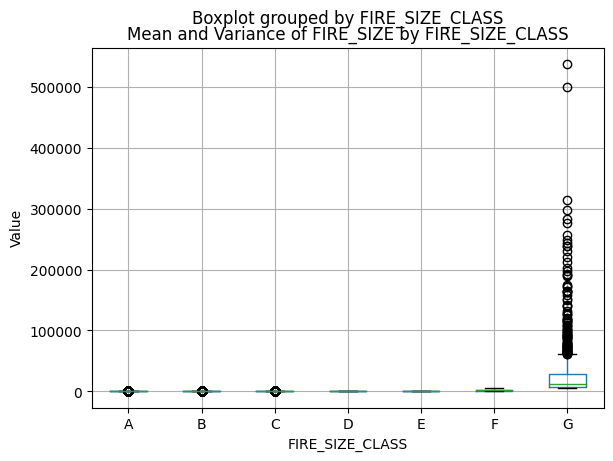

In [37]:
plot_box_plot('FIRE_SIZE', 'FIRE_SIZE_CLASS', df)

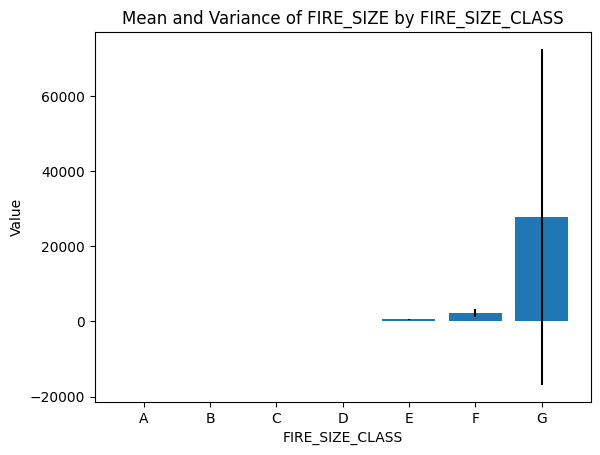

In [31]:
plot_mean_variance_by_category('FIRE_SIZE', 'FIRE_SIZE_CLASS', df)

The next thing I want to see, is how does discovery hour affects the distribution of each target class

In [ ]:
# basic package
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Projects/FirePrediction/data.csv', index_col=0)

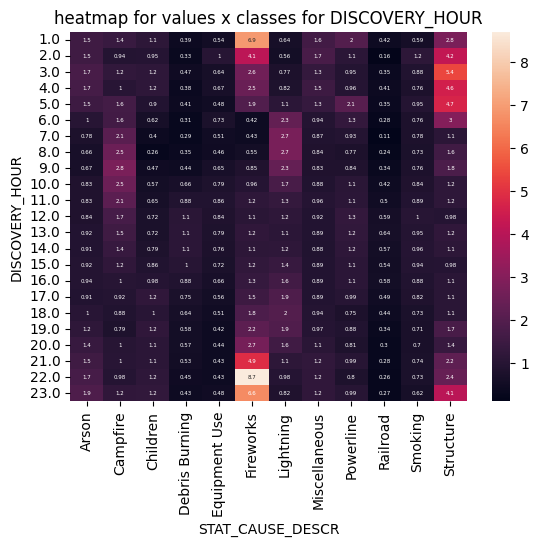

In [ ]:

df['DISCOVERY_TIME'] = pd.to_datetime(df['DISCOVERY_TIME'], format='%H%M', errors='coerce')
df['DISCOVERY_HOUR'] = df['DISCOVERY_TIME'].dt.hour
df =  df.dropna(subset=['DISCOVERY_TIME'])
plot_crosstab_heatmap_vs_original(df, 'DISCOVERY_HOUR')